# **Telstra Telecom Network Disruptions**

The problem is to predict the severity of service disruptions on the telecom network. In other words, we are supposed to predict if a disruption occurred is a momentary glitch or total interruption of connectivity.  
This will help the telecom Company to enhance customer experience by providing better connectivity. The accurate predictions of service disruptions will help Telstra serve customers better.


## Problem Statement:
Telecom networks experience service disruptions that range from momentary glitches to complete outages, impacting customer experience and network performance. Accurately predicting the severity of these disruptions (momentary glitch vs. total outage) is crucial. This prediction will enable us to:

- **Proactively manage customer expectations:** By informing customers about potential outages and estimated restoration times, we can improve customer satisfaction.
- **Optimize resource allocation:** By prioritizing repairs based on the predicted impact of the disruption, we can restore service faster and minimize downtime.
- **Enhance network resilience:** Identifying areas prone to severe disruptions allows us to take preventive measures and improve overall network stability.


## About Problem:
- It's a **multi-classification problem.** There can be 3 outcomes:  
$-\quad 0$ - **No fault**  
$-\quad 1$ - **Minor fault**<br>
$-\quad 2$ - **Major fault**  


## Available data files:

- **train.csv** - the training set for fault severity  
- **test.csv** - the test set for fault severity  
- **sample_submission.csv** - a sample submission file in the correct format  
- **event_type.csv** - event type related to the main dataset  
- **log _feature.csv** - features extracted from log files  
- **resource_type.csv** - type of resource related to the main dataset  
- **severity_type.csv** - severity type of a warning message coming from the log


## Goal:
Our goal is to develop a machine learning model that analyzes historical data and network performance metrics to predict the severity of service disruptions on the telecom network. This will empower Telstra to deliver a more reliable and responsive service to its customers.

<br>
<br>
<br>



> ### To Ignore Warnings



In [ ]:
import warnings

warnings.filterwarnings("ignore")



> ### Import the Packages



In [ ]:
import pandas as pd
import numpy as np
import datetime as dt



> ### Load and Read Data



In [ ]:
# -------------------------------------------------------------- #
#                 Load Train and Test Dataset
# -------------------------------------------------------------- #
train_df = pd.read_csv('./Data/train.csv')

test_df = pd.read_csv('./Data/test.csv')


In [ ]:
print(f"The Shape of the Train  :  {train_df.shape}")
print(f"The Shape of the Test  :  {test_df.shape}")

The Shape of the Train  :  (7381, 3)
The Shape of the Test  :  (11171, 2)


In [ ]:
train_df.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [ ]:
test_df.head()

,id,location
0,11066,location 481
1,18000,location 962
2,16964,location 491
3,4795,location 532
4,3392,location 600


In [ ]:
# -------------------------------------------------------------- #
#                 Load Severity Type Dataset
# -------------------------------------------------------------- #
severityType_df = pd.read_csv('./Data/severity_type.csv')

In [ ]:
print(f"The Shape of the Severity Type  :  {severityType_df.shape}")

The Shape of the Severity Type  :  (18552, 2)


In [ ]:
severityType_df.head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [ ]:
# -------------------------------------------------------------- #
#                 Load Event Type Dataset
# -------------------------------------------------------------- #
eventType_df = pd.read_csv('./Data/event_type.csv')

In [ ]:
print(f"The Shape of the Event Type  :  {eventType_df.shape}")

The Shape of the Event Type  :  (34082, 2)


In [ ]:
eventType_df.head()

,id,event_type
0,18552,event_type 34
1,18552,event_type 35
2,18551,event_type 11
3,18550,event_type 11
4,18549,event_type 34


In [ ]:
# -------------------------------------------------------------- #
#                 Load Log Feature Dataset
# -------------------------------------------------------------- #
logFeature_df = pd.read_csv('./Data/log_feature.csv')

In [ ]:
print(f"The Shape of the Log Feature  :  {logFeature_df.shape}")

The Shape of the Log Feature  :  (58671, 3)


In [ ]:
logFeature_df.head()

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [ ]:
# -------------------------------------------------------------- #
#                 Load Resource Type Dataset
# -------------------------------------------------------------- #
resourceType_df = pd.read_csv('./Data/resource_type.csv')

In [ ]:
print(f"The Shape of the Resource Type  :  {resourceType_df.shape}")

The Shape of the Resource Type  :  (22877, 2)


In [ ]:
resourceType_df.head()

,id,resource_type
0,1,resource_type 8
1,1,resource_type 6
2,2,resource_type 2
3,3,resource_type 8
4,4,resource_type 2




> ### Data Cleaning and Feature Engineering





>> ### Train & Test DataSet



In [ ]:
train_df['location_id'] = train_df.location.apply(lambda x: int(x.split('location ')[1]))
test_df['fault_severity'] = -1
test_df['location_id'] = test_df.location.apply(lambda x: int(x.split('location ')[1]))
train_df.head()

,id,location,fault_severity,location_id
0,14121,location 118,1,118
1,9320,location 91,0,91
2,14394,location 152,1,152
3,8218,location 931,1,931
4,14804,location 120,0,120


In [ ]:
features_df = pd.concat([train_df, test_df])
features_df = features_df.drop('location', axis=1)

In [ ]:
features_df.head()

,id,fault_severity,location_id
0,14121,1,118
1,9320,0,91
2,14394,1,152
3,8218,1,931
4,14804,0,120




>> ### Severity Type DataSet



In [ ]:
severityType_df.head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [ ]:
severityType_df.duplicated().sum()

0

In [ ]:
severity_type_order = severityType_df[['id']].drop_duplicates()

severity_type_order['order'] = 1. * np.arange(len(severity_type_order)) / len(severity_type_order)

severity_type_order.head()

,id,order
0,6597,0.000000
1,8011,0.000054
2,2597,0.000108
3,5022,0.000162
4,6852,0.000216


In [ ]:
features_df = pd.merge(features_df, severity_type_order, how='inner', on='id')

features_df.head()

,id,fault_severity,location_id,order
0,14121,1,118,0.170009
1,9320,0,91,0.912947
2,14394,1,152,0.231458
3,8218,1,931,0.932514
4,14804,0,120,0.177285


In [ ]:
location_count = features_df.groupby('location_id').count()[['id']]

location_count.columns = ['location_count']

location_count

,location_count
location_id,
1,69
2,22
3,4
4,9
5,1
...,...
1122,2
1123,1
1124,1


In [ ]:
features_df = pd.merge(features_df, location_count, how='inner', left_on='location_id', right_index=True)

print(features_df.shape)


(18552, 5)


In [ ]:
features_df.head()

,id,fault_severity,location_id,order,location_count
0,14121,1,118,0.170009,97
94,6821,0,118,0.171734,97
103,12008,0,118,0.171087,97
228,18441,0,118,0.169254,97
897,9479,0,118,0.171572,97


In [ ]:
# Check for the other rows of a location_id
features_df[features_df.location_id==1111]

,id,fault_severity,location_id,order,location_count
264,5260,0,1111,0.158635,32
581,94,2,1111,0.159228,32
760,1646,0,1111,0.157881,32
2386,9022,0,1111,0.157934,32
2579,14867,1,1111,0.158204,32
3699,11027,0,1111,0.158312,32
3824,5358,1,1111,0.158042,32
4409,1964,0,1111,0.158959,32
4638,9039,1,1111,0.159390,32
5628,90,1,1111,0.158366,32


In [ ]:
# Binarizing frequent locations
MIN_FREQ = 20

frequent_locations = location_count[location_count['location_count'] > MIN_FREQ]

frequent_locations_records = features_df[features_df['location_id'].isin(frequent_locations.index)].copy()

frequent_locations_records['value'] = 1

location_features = frequent_locations_records.pivot(index='id', columns='location_id', values='value')

location_features.columns = ['location_%i' % c for c in location_features.columns]

print(f"Shape of Location Features  :  {location_features.shape}")

Shape of Location Features  :  (13331, 247)


In [ ]:
location_features.head()

,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,...,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111
id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
features_df = pd.merge(features_df, location_features, how='left', left_on='id', right_index=True)

features_df = features_df.fillna(0)

print(f"The Shape of the updated Dataset is  :  {features_df.shape}")

The Shape of the updated Dataset is  :  (18552, 252)


In [ ]:
features_df.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,6821,0,118,0.171734,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,12008,0,118,0.171087,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,18441,0,118,0.169254,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
897,9479,0,118,0.171572,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




>> ### Event Type DataSet



In [ ]:
eventType_df.head()

,id,event_type
0,18552,event_type 34
1,18552,event_type 35
2,18551,event_type 11
3,18550,event_type 11
4,18549,event_type 34


In [ ]:
event_count = eventType_df.groupby('id').count()[['event_type']]
event_count.columns = ['event_type_count']

event_count.head()

,event_type_count
id,
1,2
2,2
3,1
4,1
5,2


In [ ]:
features_df = pd.merge(features_df, event_count, how='inner', left_on='id', right_index=True)

print(f"The Shape of the updated Dataset is  :  {features_df.shape}")

The Shape of the updated Dataset is  :  (18552, 253)


In [ ]:
features_df.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
94,6821,0,118,0.171734,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
103,12008,0,118,0.171087,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
228,18441,0,118,0.169254,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
897,9479,0,118,0.171572,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
event_type_count = eventType_df.groupby('event_type').count()[['id']].sort_values(by='id', ascending=False)

frequent_event_types = event_type_count[event_type_count['id'] > MIN_FREQ]

freq_event_records = eventType_df[eventType_df['event_type'].isin(frequent_event_types.index)].copy()

freq_event_records.head()

,id,event_type
0,18552,event_type 34
1,18552,event_type 35
2,18551,event_type 11
3,18550,event_type 11
4,18549,event_type 34


In [ ]:
event_features = pd.get_dummies(freq_event_records)

event_features

,id,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,...,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_type 47,event_type_event_type 5,event_type_event_type 50,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8
0,18552,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,18552,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18551,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,18550,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,18549,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34077,3,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34078,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34079,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34080,1,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
event_features = event_features.replace({True:1, False: 0})

In [ ]:
event_features

,id,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,...,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_type 47,event_type_event_type 5,event_type_event_type 50,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8
0,18552,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18552,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18551,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18550,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18549,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34077,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34078,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34079,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34080,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features_df = pd.merge(features_df, event_features, how='left', left_on='id', right_index=True)

print(f"The Shape of the updated Dataset is  :  {features_df.shape}")

The Shape of the updated Dataset is  :  (18552, 288)


In [ ]:
features_df.head()

,id_x,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_type 47,event_type_event_type 5,event_type_event_type 50,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,6821,0,118,0.171734,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,12008,0,118,0.171087,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,18441,0,118,0.169254,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
897,9479,0,118,0.171572,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
rare_event_types = event_type_count[event_type_count['id'] <= MIN_FREQ]

rare_event_records = eventType_df[eventType_df['event_type'].isin(rare_event_types.index)].copy()

rare_event_records['value'] = 1

rare_event_feature = rare_event_records.groupby('id').max()

# rare_event_feature.columns = ['rare_event_type']

In [ ]:
if 'value' in rare_event_feature.columns:
    rare_event_feature = rare_event_feature[['value']]
    rare_event_feature.columns = ['rare_event_type']
    print(rare_event_feature)
else:
    print("Column 'value' does not exist in the grouped DataFrame.")

       rare_event_type
id                    
72                   1
78                   1
128                  1
215                  1
283                  1
...                ...
17772                1
17834                1
17928                1
17963                1
18366                1

[131 rows x 1 columns]


In [ ]:
features_df = features_df.rename(columns= {"id_x": 'id'})

features_df.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_type 47,event_type_event_type 5,event_type_event_type 50,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,6821,0,118,0.171734,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,12008,0,118,0.171087,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,18441,0,118,0.169254,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
897,9479,0,118,0.171572,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
features_df = pd.merge(features_df, rare_event_feature, how='left', left_on='id', right_index=True)

print(f"The Shape of the updated Dataset is  :  {features_df.shape}")

The Shape of the updated Dataset is  :  (18552, 289)


In [ ]:
eventType_df['event_id'] = eventType_df.event_type.apply(lambda x: int(x.split('event_type ')[1]))

max_event_cat = eventType_df.groupby('id').max()[['event_id']] // 3
max_event_cat.columns = ['max_event_type_cat']

min_event_cat = eventType_df.groupby('id').min()[['event_id']] // 3
min_event_cat.columns = ['min_event_type_cat']

print(min_event_cat.head())
print(max_event_cat.head())

    min_event_type_cat
id                    
1                    3
2                   11
3                    3
4                   15
5                   11
    max_event_type_cat
id                    
1                    4
2                   11
3                    3
4                   15
5                   11


In [ ]:
features_df = pd.merge(features_df, max_event_cat, how='left', left_on='id', right_index=True)
features_df = pd.merge(features_df, min_event_cat, how='left', left_on='id', right_index=True)

print(f"The Shape of the updated Dataset is  :  {features_df.shape}")

The Shape of the updated Dataset is  :  (18552, 291)


In [ ]:
features_df.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,event_type_event_type 47,event_type_event_type 5,event_type_event_type 50,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8,rare_event_type,max_event_type_cat,min_event_type_cat
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,11,11
94,6821,0,118,0.171734,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,11,6
103,12008,0,118,0.171087,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,11,11
228,18441,0,118,0.169254,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,11,11
897,9479,0,118,0.171572,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,11,11


In [ ]:
features_df.isnull().sum().sum()

21956

In [ ]:
features_df = features_df.fillna(0)

features_df.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,event_type_event_type 47,event_type_event_type 5,event_type_event_type 50,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8,rare_event_type,max_event_type_cat,min_event_type_cat
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,11
94,6821,0,118,0.171734,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,6
103,12008,0,118,0.171087,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,11
228,18441,0,118,0.169254,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,11
897,9479,0,118,0.171572,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,11




>> ### Log Feture DataSet



In [ ]:
logFeature_df.head()

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [ ]:
log_feature_count = logFeature_df.groupby('id').count()[['log_feature']]

log_feature_count.columns = ['log_feature_count']

log_feature_count.head()

,log_feature_count
id,
1,3
2,5
3,1
4,1
5,2


In [ ]:
features_df.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,event_type_event_type 47,event_type_event_type 5,event_type_event_type 50,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8,rare_event_type,max_event_type_cat,min_event_type_cat
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,11
94,6821,0,118,0.171734,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,6
103,12008,0,118,0.171087,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,11
228,18441,0,118,0.169254,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,11
897,9479,0,118,0.171572,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,11


In [ ]:
features_df = pd.merge(features_df, log_feature_count, how='inner', left_on='id', right_index=True)

print(f"The Shape of the updated Dataset is  :  {features_df.shape}")

The Shape of the updated Dataset is  :  (18552, 292)


In [ ]:
log_feature_count = logFeature_df.groupby('log_feature').count()[['id']].sort_values(by='id', ascending=False)

frequent_log_features = log_feature_count[log_feature_count['id'] > MIN_FREQ]

frequent_log_feature_records = logFeature_df[logFeature_df['log_feature'].isin(frequent_log_features.index)].copy()

frequent_log_feature_records

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1
...,...,...,...
58666,8720,feature 209,1
58667,6488,feature 54,3
58668,878,feature 62,1
58669,4464,feature 209,1


In [ ]:
log_feature = pd.get_dummies(frequent_log_feature_records)

log_feature.shape

(57587, 149)

In [ ]:
log_feature.head()

,id,volume,log_feature_feature 1,log_feature_feature 10,log_feature_feature 101,log_feature_feature 103,log_feature_feature 105,log_feature_feature 108,log_feature_feature 109,log_feature_feature 111,...,log_feature_feature 80,log_feature_feature 81,log_feature_feature 82,log_feature_feature 83,log_feature_feature 84,log_feature_feature 85,log_feature_feature 86,log_feature_feature 87,log_feature_feature 94,log_feature_feature 95
0,6597,6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8011,7,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2597,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5022,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5022,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
log_feature = log_feature.replace({True: 1, False: 0})

In [ ]:
log_feature.head()

,id,volume,log_feature_feature 1,log_feature_feature 10,log_feature_feature 101,log_feature_feature 103,log_feature_feature 105,log_feature_feature 108,log_feature_feature 109,log_feature_feature 111,...,log_feature_feature 80,log_feature_feature 81,log_feature_feature 82,log_feature_feature 83,log_feature_feature 84,log_feature_feature 85,log_feature_feature 86,log_feature_feature 87,log_feature_feature 94,log_feature_feature 95
0,6597,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8011,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2597,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5022,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5022,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features_df = pd.merge(features_df, log_feature, how='left', left_on='id', right_index=True)

print(f"The Shape of the updated Dataset is  :  {features_df.shape}")

The Shape of the updated Dataset is  :  (18552, 441)


In [ ]:
features_df.head()

,id_x,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,log_feature_feature 80,log_feature_feature 81,log_feature_feature 82,log_feature_feature 83,log_feature_feature 84,log_feature_feature 85,log_feature_feature 86,log_feature_feature 87,log_feature_feature 94,log_feature_feature 95
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,6821,0,118,0.171734,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,12008,0,118,0.171087,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,18441,0,118,0.169254,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
897,9479,0,118,0.171572,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
features_df = features_df.rename(columns={'id_x':'id'})

In [ ]:
features_df.head()


,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,log_feature_feature 80,log_feature_feature 81,log_feature_feature 82,log_feature_feature 83,log_feature_feature 84,log_feature_feature 85,log_feature_feature 86,log_feature_feature 87,log_feature_feature 94,log_feature_feature 95
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,6821,0,118,0.171734,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,12008,0,118,0.171087,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,18441,0,118,0.169254,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
897,9479,0,118,0.171572,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
rare_log_fetures = log_feature_count[log_feature_count['id'] <= MIN_FREQ]

rare_log_feture_records = logFeature_df[logFeature_df['log_feature'].isin(rare_log_fetures.index)].copy()

rare_log_feture_records['value'] = 1

rare_log_feture = rare_log_feture_records.groupby('id').max()[['value']]

rare_log_feture.columns = ['rare_log_feature']

rare_log_feture.head()

,rare_log_feature
id,
50,1
72,1
78,1
89,1
105,1


In [ ]:
rare_log_feture.shape

(684, 1)

In [ ]:
features_df = pd.merge(features_df, rare_log_feture, how='left', left_on='id', right_index=True)

print(f"The Shape of the updated Dataset is  :  {features_df.shape}")

The Shape of the updated Dataset is  :  (18552, 442)


In [ ]:
features_df.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,log_feature_feature 81,log_feature_feature 82,log_feature_feature 83,log_feature_feature 84,log_feature_feature 85,log_feature_feature 86,log_feature_feature 87,log_feature_feature 94,log_feature_feature 95,rare_log_feature
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
94,6821,0,118,0.171734,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
103,12008,0,118,0.171087,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
228,18441,0,118,0.169254,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
897,9479,0,118,0.171572,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
FEATURE_CAT = 5

logFeature_df['log_feature_id'] = logFeature_df.log_feature.apply(lambda x: int(x.split('feature ')[1]))

logFeature_df.head()

,id,log_feature,volume,log_feature_id
0,6597,feature 68,6,68
1,8011,feature 68,7,68
2,2597,feature 68,1,68
3,5022,feature 172,2,172
4,5022,feature 56,1,56


In [ ]:
logFeature_df[logFeature_df.id == 18]

,id,log_feature,volume,log_feature_id
11303,18,feature 307,5,307
11304,18,feature 315,4,315
11305,18,feature 313,10,313
11306,18,feature 233,10,233
11307,18,feature 232,33,232
11308,18,feature 227,2,227
11309,18,feature 312,24,312
11310,18,feature 235,4,235


In [ ]:
logFeature_df[logFeature_df.log_feature_id == 68]

,id,log_feature,volume,log_feature_id
0,6597,feature 68,6,68
1,8011,feature 68,7,68
2,2597,feature 68,1,68
23,6914,feature 68,11,68
41,16416,feature 68,4,68
...,...,...,...,...
58608,8390,feature 68,1,68
58618,14027,feature 68,1,68
58624,18243,feature 68,1,68
58637,9423,feature 68,2,68


In [ ]:
max_log_feature_cat = logFeature_df.groupby('id').max()[['log_feature_id']] // FEATURE_CAT
max_log_feature_cat.columns = ['max_log_feature_cat']

min_log_feature_cat = logFeature_df.groupby('id').min()[['log_feature_id']] // FEATURE_CAT
min_log_feature_cat.columns = ['min_log_feature_cat']


In [ ]:
print(max_log_feature_cat)
print()
print(min_log_feature_cat)

       max_log_feature_cat
id                        
1                       69
2                       63
3                       34
4                       74
5                       62
...                    ...
18548                   63
18549                   62
18550                   39
18551                   39
18552                   62

[18552 rows x 1 columns]

       min_log_feature_cat
id                        
1                       13
2                       46
3                       34
4                       74
5                       46
...                    ...
18548                   46
18549                   26
18550                   14
18551                   14
18552                   46

[18552 rows x 1 columns]


In [ ]:
features_df = pd.merge(features_df, max_log_feature_cat, how='left', left_on='id', right_index=True)
features_df = pd.merge(features_df, min_log_feature_cat, how='left', left_on='id', right_index=True)

print(f"The Shape of the updated Dataset is  :  {features_df.shape}")

The Shape of the updated Dataset is  :  (18552, 444)


In [ ]:
logFeature_df['log_feature_id_cat'] = logFeature_df['log_feature_id'] // FEATURE_CAT

log_feature_cat = logFeature_df.groupby(['id', 'log_feature_id_cat']).sum()['volume']

log_feature_cat = log_feature_cat.reset_index()

log_feature_cat_feature = log_feature_cat.pivot(index='id', columns='log_feature_id_cat', values='volume')

log_feature_cat_feature.columns = ['log_feature_cat_%i' % c for c in log_feature_cat_feature.columns]

log_feature_cat_feature.head()

,log_feature_cat_0,log_feature_cat_1,log_feature_cat_2,log_feature_cat_3,log_feature_cat_4,log_feature_cat_5,log_feature_cat_6,log_feature_cat_7,log_feature_cat_8,log_feature_cat_9,...,log_feature_cat_68,log_feature_cat_69,log_feature_cat_70,log_feature_cat_71,log_feature_cat_72,log_feature_cat_73,log_feature_cat_74,log_feature_cat_75,log_feature_cat_76,log_feature_cat_77
id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
features_df = pd.merge(features_df, log_feature_cat_feature, how='left', left_on='id', right_index=True)

features_df = features_df.fillna(0)

print(f"The Shape of the updated Dataset is  :  {features_df.shape}")

The Shape of the updated Dataset is  :  (18552, 522)


In [ ]:
logFeature_df.loc[logFeature_df['volume'] > 49, 'volume'] = 50

volume_counts = logFeature_df.groupby(['id', 'volume']).count()[['log_feature']].reset_index()

volume_features = volume_counts.pivot(index='id', columns='volume', values='log_feature')

volume_features.columns = ['volume_%i' % c for c in volume_features.columns]

volume_features

,volume_1,volume_2,volume_3,volume_4,volume_5,volume_6,volume_7,volume_8,volume_9,volume_10,...,volume_41,volume_42,volume_43,volume_44,volume_45,volume_46,volume_47,volume_48,volume_49,volume_50
id,,,,,,,,,,,,,,,,,,,,,
1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18548,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18549,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18550,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
volume_features[volume_features.index == 1]

,volume_1,volume_2,volume_3,volume_4,volume_5,volume_6,volume_7,volume_8,volume_9,volume_10,...,volume_41,volume_42,volume_43,volume_44,volume_45,volume_46,volume_47,volume_48,volume_49,volume_50
id,,,,,,,,,,,,,,,,,,,,,
1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
logFeature_df[logFeature_df.id == 1]

,id,log_feature,volume,log_feature_id,log_feature_id_cat
36197,1,feature 68,2,68,13
36198,1,feature 345,2,345,69
36199,1,feature 179,1,179,35


In [ ]:
features_df = pd.merge(features_df, volume_features, how='left', left_on='id', right_index=True)

features_df = features_df.fillna(0)

print(f"The Shape of the updated Dataset is  :  {features_df.shape}")

The Shape of the updated Dataset is  :  (18552, 572)


In [ ]:
features_df.isnull().sum().sum()

0



>> ### Resource Type DataSet




In [ ]:
resourceType_df.head()

,id,resource_type
0,1,resource_type 8
1,1,resource_type 6
2,2,resource_type 2
3,3,resource_type 8
4,4,resource_type 2


In [ ]:
resourceType_df['value'] = 1
resource_type_count = resourceType_df.groupby('id').count()[['value']]

resource_type_count.columns = ['resource_type_count']

In [ ]:
features_df = pd.merge(features_df, resource_type_count, how='left', left_on='id', right_index=True)

print(f"The Shape of the updated Dataset is  :  {features_df.shape}")


The Shape of the updated Dataset is  :  (18552, 573)


In [ ]:
features_df

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,volume_42,volume_43,volume_44,volume_45,volume_46,volume_47,volume_48,volume_49,volume_50,resource_type_count
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
94,6821,0,118,0.171734,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
103,12008,0,118,0.171087,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
228,18441,0,118,0.169254,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
897,9479,0,118,0.171572,97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190,16651,-1,178,0.254097,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18231,5810,-1,383,0.377587,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18266,8952,-1,581,0.546464,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
18295,312,-1,728,0.679226,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
resource_type_feature = pd.get_dummies(resourceType_df)
resource_type_feature.columns = [c.replace('resource_type_', '') for c in resource_type_feature.columns]
resource_type_feature.columns = [c.replace('resource_type', 'resource_type_') for c in resource_type_feature.columns]

print(f"The shape of the resource_type_feature  :  {resource_type_feature.shape}")

resource_type_feature.head()

The shape of the resource_type_feature  :  (22877, 13)


,id,value,1,resource_type_ 1,resource_type_ 10,resource_type_ 2,resource_type_ 3,resource_type_ 4,resource_type_ 5,resource_type_ 6,resource_type_ 7,resource_type_ 8,resource_type_ 9
0,1,1,False,False,False,False,False,False,False,False,False,True,False
1,1,1,False,False,False,False,False,False,False,True,False,False,False
2,2,1,False,False,False,True,False,False,False,False,False,False,False
3,3,1,False,False,False,False,False,False,False,False,False,True,False
4,4,1,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
resource_type_feature = resource_type_feature.replace({True: 1, False: 0})

resource_type_feature.head()

,id,value,1,resource_type_ 1,resource_type_ 10,resource_type_ 2,resource_type_ 3,resource_type_ 4,resource_type_ 5,resource_type_ 6,resource_type_ 7,resource_type_ 8,resource_type_ 9
0,1,1,0,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,1,0,0,0
2,2,1,0,0,0,1,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,0,1,0
4,4,1,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
features_df = pd.merge(features_df, resource_type_feature, how='left', left_on='id', right_index=True)

print(f"The Shape of the updated Dataset is  :  {features_df.shape}")


The Shape of the updated Dataset is  :  (18552, 586)




>> ### Severity Type DataSet



In [ ]:
severityType_df.head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [ ]:
severity_type_features = pd.get_dummies(severityType_df)

severity_type_features.columns = [c.replace('severity_type_', '') for c in severity_type_features.columns]
severity_type_features.columns = [c.replace('severity_type', 'severity_type_') for c in severity_type_features.columns]

severity_type_features.head()

,id,severity_type_ 1,severity_type_ 2,severity_type_ 3,severity_type_ 4,severity_type_ 5
0,6597,False,True,False,False,False
1,8011,False,True,False,False,False
2,2597,False,True,False,False,False
3,5022,True,False,False,False,False
4,6852,True,False,False,False,False


In [ ]:
severity_type_features.replace({True: 1, False: 0})

,id,severity_type_ 1,severity_type_ 2,severity_type_ 3,severity_type_ 4,severity_type_ 5
0,6597,0,1,0,0,0
1,8011,0,1,0,0,0
2,2597,0,1,0,0,0
3,5022,1,0,0,0,0
4,6852,1,0,0,0,0
...,...,...,...,...,...,...
18547,3761,1,0,0,0,0
18548,8720,1,0,0,0,0
18549,6488,0,1,0,0,0
18550,878,0,1,0,0,0


In [ ]:
features_df.head()

,id_x,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,resource_type_ 1,resource_type_ 10,resource_type_ 2,resource_type_ 3,resource_type_ 4,resource_type_ 5,resource_type_ 6,resource_type_ 7,resource_type_ 8,resource_type_ 9
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
94,6821,0,118,0.171734,97,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
103,12008,0,118,0.171087,97,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
228,18441,0,118,0.169254,97,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
897,9479,0,118,0.171572,97,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
features_df = features_df.rename(columns={'id_x': 'id'})

In [ ]:
features_df.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,resource_type_ 1,resource_type_ 10,resource_type_ 2,resource_type_ 3,resource_type_ 4,resource_type_ 5,resource_type_ 6,resource_type_ 7,resource_type_ 8,resource_type_ 9
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
94,6821,0,118,0.171734,97,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
103,12008,0,118,0.171087,97,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
228,18441,0,118,0.169254,97,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
897,9479,0,118,0.171572,97,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
features_df = pd.merge(features_df, severity_type_features, how='left', left_on='id', right_index=True)

print(f"The Shape of the updated Dataset is  :  {features_df.shape}")


The Shape of the updated Dataset is  :  (18552, 592)


In [ ]:
features_df = features_df.rename(columns={'id_x': 'id'})

In [ ]:
features_df.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,resource_type_ 6,resource_type_ 7,resource_type_ 8,resource_type_ 9,id_y,severity_type_ 1,severity_type_ 2,severity_type_ 3,severity_type_ 4,severity_type_ 5
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,17133.0,True,False,False,False,False
94,6821,0,118,0.171734,97,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,7250.0,False,True,False,False,False
103,12008,0,118,0.171087,97,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,401.0,True,False,False,False,False
228,18441,0,118,0.169254,97,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,3763.0,True,False,False,False,False
897,9479,0,118,0.171572,97,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,7778.0,False,True,False,False,False


In [ ]:
features_df = features_df.replace({True: 1, False: 0})

In [ ]:
features_df

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,resource_type_ 6,resource_type_ 7,resource_type_ 8,resource_type_ 9,id_y,severity_type_ 1,severity_type_ 2,severity_type_ 3,severity_type_ 4,severity_type_ 5
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,17133.0,1.0,0.0,0.0,0.0,0.0
94,6821,0,118,0.171734,97,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,7250.0,0.0,1.0,0.0,0.0,0.0
103,12008,0,118,0.171087,97,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,401.0,1.0,0.0,0.0,0.0,0.0
228,18441,0,118,0.169254,97,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,3763.0,1.0,0.0,0.0,0.0,0.0
897,9479,0,118,0.171572,97,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,7778.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190,16651,-1,178,0.254097,1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1796.0,1.0,0.0,0.0,0.0,0.0
18231,5810,-1,383,0.377587,1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,12491.0,1.0,0.0,0.0,0.0,0.0
18266,8952,-1,581,0.546464,1,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,14551.0,0.0,1.0,0.0,0.0,0.0
18295,312,-1,728,0.679226,1,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,200.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
features_df.isnull().sum().sum()

6

In [ ]:
features_df = features_df.fillna(0)

In [ ]:
features_df.isnull().sum().sum()

0

In [ ]:
LOCATION_CAT = 4

features_df['location_cat'] = features_df['location_id'] // LOCATION_CAT
features_df['location_cat2'] = (features_df['location_id'] + LOCATION_CAT // 2) // LOCATION_CAT

features_df = features_df.sort_values(by='order')

feature_names = list(features_df.columns)

feature_names.remove('id')
feature_names.remove('fault_severity')
feature_names.remove('location_id')
feature_names.remove('order')

feature_names

['location_count',
 'location_1',
 'location_2',
 'location_7',
 'location_9',
 'location_12',
 'location_13',
 'location_16',
 'location_17',
 'location_89',
 'location_91',
 'location_95',
 'location_100',
 'location_102',
 'location_116',
 'location_118',
 'location_122',
 'location_124',
 'location_126',
 'location_128',
 'location_133',
 'location_135',
 'location_139',
 'location_145',
 'location_147',
 'location_149',
 'location_155',
 'location_157',
 'location_159',
 'location_161',
 'location_169',
 'location_181',
 'location_206',
 'location_208',
 'location_240',
 'location_242',
 'location_244',
 'location_255',
 'location_266',
 'location_268',
 'location_270',
 'location_282',
 'location_283',
 'location_288',
 'location_292',
 'location_298',
 'location_300',
 'location_311',
 'location_314',
 'location_318',
 'location_324',
 'location_325',
 'location_326',
 'location_344',
 'location_363',
 'location_373',
 'location_375',
 'location_378',
 'location_380',
 'location

In [ ]:
features_df.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,resource_type_ 8,resource_type_ 9,id_y,severity_type_ 1,severity_type_ 2,severity_type_ 3,severity_type_ 4,severity_type_ 5,location_cat,location_cat2
14391,6597,-1,1,0.000000,69,1.0,0.0,0.0,0.0,0.0,...,0,0,14526.0,1.0,0.0,0.0,0.0,0.0,0,0
144,8011,0,1,0.000054,69,1.0,0.0,0.0,0.0,0.0,...,0,0,11626.0,0.0,1.0,0.0,0.0,0.0,0,0
10841,2597,-1,1,0.000108,69,1.0,0.0,0.0,0.0,0.0,...,0,0,6768.0,1.0,0.0,0.0,0.0,0.0,0,0
15311,5022,-1,1,0.000162,69,1.0,0.0,0.0,0.0,0.0,...,0,0,7191.0,0.0,1.0,0.0,0.0,0.0,0,0
15337,6852,-1,1,0.000216,69,1.0,0.0,0.0,0.0,0.0,...,1,0,16250.0,0.0,1.0,0.0,0.0,0.0,0,0


In [ ]:
# Rank Features

features_df['location_rank_asc'] = features_df.groupby('location_id')[['order']].rank()
features_df['location_rank_desc'] = features_df.groupby('location_id')[['order']].rank(ascending=False)
features_df['location_rank_rel'] = 1. * features_df['location_rank_asc'] / features_df['location_count']
features_df['location_rank_rel'] = np.round(features_df['location_rank_rel'], 2)

In [ ]:
features_df.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,severity_type_ 1,severity_type_ 2,severity_type_ 3,severity_type_ 4,severity_type_ 5,location_cat,location_cat2,location_rank_asc,location_rank_desc,location_rank_rel
14391,6597,-1,1,0.000000,69,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0,1.0,69.0,0.01
144,8011,0,1,0.000054,69,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,2.0,68.0,0.03
10841,2597,-1,1,0.000108,69,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0,3.0,67.0,0.04
15311,5022,-1,1,0.000162,69,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,4.0,66.0,0.06
15337,6852,-1,1,0.000216,69,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,5.0,65.0,0.07


In [ ]:
print(f"The Shape of the Final Dataset is  :  {features_df.shape}")

The Shape of the Final Dataset is  :  (18552, 597)


In [ ]:
# Export the final dataset as csv
features_df.to_csv('./Data/final_features.csv', index=False)



> ### Feature Selection



In [ ]:
df = pd.read_csv('./Data/final_features.csv')

In [ ]:
df.shape

(18552, 597)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,...,severity_type_ 1,severity_type_ 2,severity_type_ 3,severity_type_ 4,severity_type_ 5,location_cat,location_cat2,location_rank_asc,location_rank_desc,location_rank_rel
0,6597,-1,1,0.000000,69,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0,1.0,69.0,0.01
1,8011,0,1,0.000054,69,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,2.0,68.0,0.03
2,2597,-1,1,0.000108,69,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0,3.0,67.0,0.04
3,5022,-1,1,0.000162,69,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,4.0,66.0,0.06
4,6852,-1,1,0.000216,69,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,5.0,65.0,0.07


In [ ]:
train = df[df['fault_severity'] >= 0].copy()

In [ ]:
print(f"The Shape of the TRAIN set : {train.shape}")

The Shape of the TRAIN set : (7381, 597)


In [ ]:
all_feature_names = list(train.columns)

In [ ]:
len(all_feature_names)

597

In [ ]:
all_feature_names.remove('id')
all_feature_names.remove('fault_severity')
all_feature_names.remove('location_id')
all_feature_names.remove('order')

In [ ]:
len(all_feature_names)

593

In [ ]:
import xgboost as XGB

In [ ]:
def print_success_message(model_name):
    print("\n")
    print("="*50)
    print(f"{'🎉 Model Training Successful! 🎉':^50}")
    print("="*50)
    print(f"Model Name: {model_name}")

In [ ]:
# ------------------------------------------------------------------------ #
#  Training the XgBoost model for feature selection
# ------------------------------------------------------------------------ #

parameters = {
    'min_child_weight': 3,
    'eta': 0.05,
    'colsmple_bytree': 0.4,
    'max_depth': 10,
    'subsample': 0.9,
    'lambda': 0.5,
    'nthread': -1,
    'objective': 'multi:softprob',
    'silent': 0,
    'num_class': 3
}

fs = ['f%i' % i for i in range(len(all_feature_names))]
dtrain = XGB.DMatrix(train[all_feature_names].values,
                     label=train['fault_severity'].values,
                     missing=9999,
                     feature_names=fs)
model = XGB.train(parameters, dtrain, 1000)
model_name = 'XgBoost'
print_success_message(model_name)



          🎉 Model Training Successful! 🎉          
Model Name: XgBoost


In [ ]:
feature_imp = model.get_fscore()

In [ ]:
print(feature_imp)

{'f0': 7440.0, 'f3': 6.0, 'f10': 1.0, 'f11': 2.0, 'f13': 10.0, 'f14': 7.0, 'f15': 8.0, 'f19': 11.0, 'f21': 14.0, 'f25': 1.0, 'f28': 10.0, 'f34': 4.0, 'f36': 1.0, 'f37': 1.0, 'f44': 17.0, 'f46': 24.0, 'f47': 34.0, 'f56': 9.0, 'f61': 6.0, 'f64': 147.0, 'f81': 26.0, 'f106': 9.0, 'f108': 26.0, 'f110': 20.0, 'f113': 25.0, 'f114': 3.0, 'f117': 10.0, 'f119': 2.0, 'f120': 6.0, 'f124': 27.0, 'f126': 12.0, 'f128': 1.0, 'f130': 14.0, 'f133': 20.0, 'f134': 4.0, 'f136': 25.0, 'f138': 22.0, 'f141': 84.0, 'f142': 6.0, 'f143': 2.0, 'f144': 10.0, 'f146': 1.0, 'f147': 31.0, 'f148': 26.0, 'f149': 5.0, 'f150': 53.0, 'f152': 7.0, 'f153': 4.0, 'f154': 23.0, 'f158': 16.0, 'f161': 7.0, 'f162': 20.0, 'f163': 18.0, 'f164': 56.0, 'f165': 33.0, 'f168': 13.0, 'f170': 4.0, 'f171': 3.0, 'f172': 1.0, 'f173': 15.0, 'f175': 32.0, 'f178': 1.0, 'f181': 1.0, 'f182': 28.0, 'f183': 7.0, 'f184': 69.0, 'f185': 15.0, 'f186': 2.0, 'f188': 14.0, 'f192': 47.0, 'f193': 24.0, 'f194': 63.0, 'f195': 5.0, 'f198': 3.0, 'f199': 2.0, 'f2

In [ ]:
f_score = pd.DataFrame(list(feature_imp.items()), columns=['f_score', 'imp'])

f_score.head()

,f_score,imp
0,f0,7440.0
1,f3,6.0
2,f10,1.0
3,f11,2.0
4,f13,10.0


In [ ]:
fscore = pd.DataFrame({'f_score': fs, 'feature-name': all_feature_names})

In [ ]:
fscore.head()

,f_score,feature-name
0,f0,location_count
1,f1,location_1
2,f2,location_2
3,f3,location_7
4,f4,location_9


In [ ]:
feature_importance = pd.merge(f_score, fscore, how='right', on='f_score')

In [ ]:
feature_importance.head()

,f_score,imp,feature-name
0,f0,7440.0,location_count
1,f1,NaN,location_1
2,f2,NaN,location_2
3,f3,6.0,location_7
4,f4,NaN,location_9


In [ ]:
feature_importance = feature_importance.fillna(0)

In [ ]:
feature_importance.head()

,f_score,imp,feature-name
0,f0,7440.0,location_count
1,f1,0.0,location_1
2,f2,0.0,location_2
3,f3,6.0,location_7
4,f4,0.0,location_9


In [ ]:
feature_importance.shape

(593, 3)

In [ ]:
feature_importance.to_csv('./Data/feature_importance.csv', index=False)

In [ ]:
important_features = pd.read_csv('./Data/feature_importance.csv')

In [ ]:
important_features.isnull().sum().sum()

0

In [ ]:
drop_cols = list(important_features[important_features['imp'] < 1]['feature-name'])

print(f"The length of the dropable columns are : {len(drop_cols)}")

The length of the dropable columns are : 317


In [ ]:
train = df[df['fault_severity'] >= 0].copy()
test = df[df['fault_severity'] < 0].copy()

print(f"The Shape of the Train set  :  {train.shape}")
print(f"The Shape of the Test set  :  {test.shape}")

The Shape of the Train set  :  (7381, 597)
The Shape of the Test set  :  (11171, 597)


In [ ]:
feature_names = list(train.columns)

feature_names.remove('id')
feature_names.remove('fault_severity')
feature_names.remove('location_id')
feature_names.remove('order')

feature_names = list(set(feature_names) - set(drop_cols))

print(f"Features  :  {len(feature_names)}")

Features  :  276


In [ ]:
598 - 276

322

In [ ]:
feature_names

['location_995',
 'log_feature_cat_56',
 'location_1107',
 'volume_34',
 'rare_event_type',
 'log_feature_cat_31',
 'event_type_event_type 47',
 'log_feature_feature 74',
 'log_feature_feature 56',
 'location_102',
 'location_292',
 'log_feature_cat_63',
 'log_feature_cat_17',
 'log_feature_feature 312',
 'event_type_event_type 14',
 'log_feature_feature 80',
 'log_feature_cat_30',
 'log_feature_cat_16',
 'log_feature_cat_73',
 'location_745',
 'volume_10',
 'log_feature_feature 170',
 'location_1052',
 'location_826',
 'event_type_event_type 20',
 'resource_type_ 8',
 'location_704',
 'log_feature_feature 219',
 'location_300',
 'log_feature_cat_72',
 'volume_2',
 'location_897',
 'severity_type_ 2',
 'location_810',
 'location_744',
 'volume_5',
 'location_1033',
 'location_802',
 'event_type_event_type 10',
 'log_feature_feature 313',
 'location_375',
 'log_feature_cat_9',
 'event_type_event_type 42',
 'severity_type_ 4',
 'volume_42',
 'log_feature_feature 55',
 'location_311',
 'l

In [ ]:
train.fault_severity.unique()

array([0, 2, 1])

In [ ]:
train.fault_severity.value_counts()

fault_severity
0    4784
1    1871
2     726
Name: count, dtype: int64



> ### Model Building and Evaluation



In [ ]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
def plot_confusion_matrix(confmat, classes, normalized=True, cmap='bone'):
    """
    Plots a confusion matrix using seaborn's heatmap.

    Parameters:
    confmat (ndarray): Confusion matrix to be plotted.
    classes (list): List of class names.
    normalized (bool): Whether to normalize the confusion matrix. Default is True.
    cmap (str): Colormap to be used for the heatmap. Default is 'bone'.
    """

    # Set up the figure size
    plt.figure(figsize=(7, 6))

    # Initialize the matrix to be plotted
    norm_cmat = confmat

    # Normalize the confusion matrix if specified
    if normalized:
        norm_cmat = confmat.astype('float') / confmat.sum(axis=1)[:, np.newaxis]
        # Plot the heatmap
        sns.heatmap(norm_cmat, annot=confmat, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        # Set the title and labels
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        # Save the plot as a file
        plt.savefig('confusion_matrix.png')
        plt.show()  # Show the plot

In [ ]:
# Function to fit the model
def FitModel(X, y, model_name, model_algorithm, gridSearchParams, cv):

  np.random.seed(10)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

  print("\n")
  print("="*50)
  print(f"{' INFO ':^50}")
  print("="*50)
  print()
  print("="*50)
  print(f"{' The Data has been splitted! ':^50}")
  print("="*50)
  print()
  print(f"Training Dataset Shape  :  {X_train.shape}")
  print(f"Test Dataset Shape  :  {X_test.shape}")
  print(f"Training Label Shape  :  {y_train.shape}")
  print(f"Test Label Shape  :  {y_test.shape}")

  grid = GridSearchCV(
      estimator=model_algorithm,
      param_grid=gridSearchParams,
      cv=cv,
      scoring='accuracy',
      n_jobs=-1,
      verbose=1
  )

  print()
  print("="*50)
  print(f"{' The training has been started ... ':^50}")
  print("="*50)
  print()

  result = grid.fit(X_train, y_train)
  best_params = result.best_params_

  print()
  print("="*50)
  print(f"{' Predicting on test set ... ':^50}")
  print("="*50)
  print()

  pred = result.predict(X_test)
  cmat = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  report = classification_report(y_test, pred)

  print()
  print("="*50)
  print(f"{' Predicted Values are ... ':^50}")
  print("="*50)
  print()
  print(pred)
  print()
  print("="*50)
  print(f"{' Metrics Values ... ':^50}")
  print("="*50)
  print()
  print(f"The Accuracy Score  :  {str(accuracy)}")
  print(f"The Confusion Matrix  :  {cmat}")
  print(f"The Best Params are : {best_params}")
  print(f"The Classification Report : \n{report}")
  print()
  print("="*50)
  print(f"{' The Confusion Matrix Plot ... ':^50}")
  print("="*50)

  plot_confusion_matrix(cmat, ['0','1', '2'])



                       INFO                       

           The Data has been splitted!            

Training Dataset Shape  :  (6273, 276)
Test Dataset Shape  :  (1108, 276)
Training Label Shape  :  (6273,)
Test Label Shape  :  (1108,)

        The training has been started ...         

Fitting 5 folds for each of 20 candidates, totalling 100 fits

            Predicting on test set ...            


             Predicted Values are ...             

[0 0 0 ... 0 0 0]

                Metrics Values ...                

The Accuracy Score  :  0.7924187725631769
The Confusion Matrix  :  [[621  71   9]
 [105 177  16]
 [  7  22  80]]
The Best Params are : {'max_depth': 8, 'n_estimators': 100}
The Classification Report :               precision    recall  f1-score   support

           0       0.85      0.89      0.87       701
           1       0.66      0.59      0.62       298
           2       0.76      0.73      0.75       109

    accuracy                           0.79    

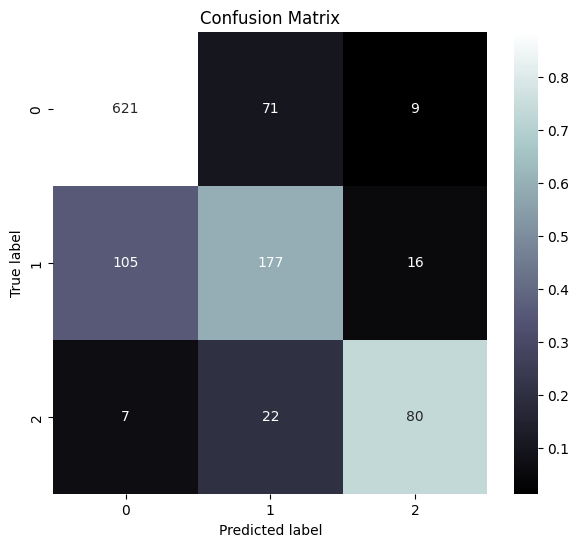

In [ ]:
params = {
     'n_estimators': [100, 500, 1000, 2000],
     'max_depth': [2, 4, 6, 8, 10]
 }

FitModel(train[feature_names],
         train.fault_severity,
         "XGBoost",
         XGB.XGBClassifier(n_jobs=-1, objective='softprob'),
         params,
         cv=5)



> ### Balancing The DataSet



In [ ]:
train.fault_severity.value_counts()

fault_severity
0    4784
1    1871
2     726
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
SM = SMOTE(random_state=42)

X_resamples, y_resamples = SM.fit_resample(train[feature_names], train.fault_severity)

In [ ]:
print(f"The Shape of the X_resample   :  {X_resamples.shape}")
print(f"The Shape of the y_resample   :  {y_resamples.shape}")

The Shape of the X_resample   :  (14352, 276)
The Shape of the y_resample   :  (14352,)


In [ ]:
pd.Series(y_resamples).value_counts()

fault_severity
0    4784
2    4784
1    4784
Name: count, dtype: int64



                       INFO                       

           The Data has been splitted!            

Training Dataset Shape  :  (12199, 276)
Test Dataset Shape  :  (2153, 276)
Training Label Shape  :  (12199,)
Test Label Shape  :  (2153,)

        The training has been started ...         

Fitting 5 folds for each of 20 candidates, totalling 100 fits

            Predicting on test set ...            


             Predicted Values are ...             

[1 0 1 ... 0 0 2]

                Metrics Values ...                

The Accuracy Score  :  0.903855085926614
The Confusion Matrix  :  [[655  71   8]
 [ 87 605  19]
 [ 13   9 686]]
The Best Params are : {'max_depth': 10, 'n_estimators': 500}
The Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       734
           1       0.88      0.85      0.87       711
           2       0.96      0.97      0.97       708

    accuracy                           0.90 

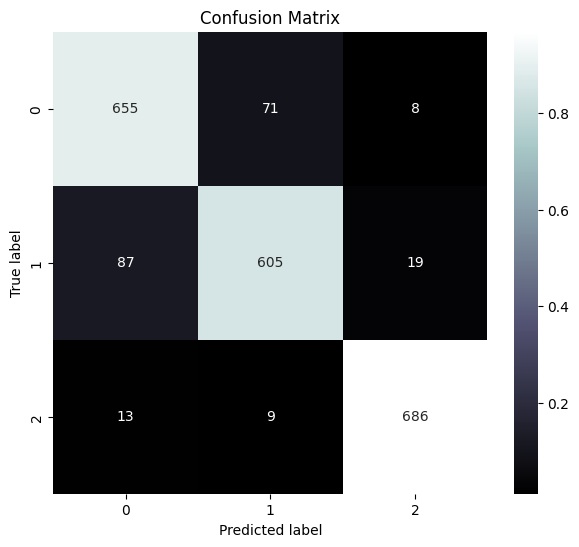

In [170]:
params = {
     'n_estimators': [100, 500, 1000, 2000],
     'max_depth': [2, 4, 6, 8, 10]
 }

FitModel(X_resamples,
         y_resamples,
         "XGBoost",
         XGB.XGBClassifier(n_jobs=-1, objective='softprob'),
         params,
         cv=5)

---
<br>

*Initially, the model achieved 79% accuracy. After balancing the dataset to address class imbalances, the model's accuracy improved significantly to 90%.*

<br>